### visualize the pair_files (200 taxonomys)
- `seqs_taxo.pkl`

In [2]:
import pickle
from collections import defaultdict
import ast
import pandas as pd
import matplotlib as mpl
# import seaborn as sns
# mpl.get_backend()
import matplotlib.pyplot as plt
import numpy as np
from pyforest import *
import pyforest; pyforest.disable_javascript_update()
from icecream import ic

In [3]:
"""seqs_tax.pkl (This file does not contain the common sequence data. Only the raw data.)
key: taxo_name
value: [SeqRecord(o.seq, o.id. o.name, o.description), ...] len(v) means how many orgranisms are in this taxonomy.

optional:
    If need the consensus strings, need to read con_file/{k}.txt
"""

seqs_taxo = defaultdict(list)
with open('seqs_taxo.pkl','rb') as f:
    seqs_taxo = pickle.load(f)
len(seqs_taxo)
# {k:name : v:full_sequence}

200

In [3]:
seqs_taxo.keys()

dict_keys(['Bacteria', 'Proteobacteria', 'Betaproteobacteria', 'Burkholderiales', 'Firmicutes', 'Bacilli', 'Bacillales', 'Bacillaceae', 'Bacillus', 'Eukaryota', 'Clostridia', 'Clostridiales', 'Peptostreptococcaceae', 'Bacteroidetes', 'Flavobacteriia', 'Flavobacteriales', 'Flavobacteriaceae', 'Actinobacteria', 'Propionibacteriales', 'Propionibacteriaceae', 'Cutibacterium', 'Gammaproteobacteria', 'Metazoa', 'Ecdysozoa', 'Arthropoda', 'Hexapoda', 'Insecta', 'Pterygota', 'Neoptera', 'Alphaproteobacteria', 'Holometabola', 'Pseudomonadales', 'Crustacea', 'Multicrustacea', 'Actinomycetales', 'Actinomycetaceae', 'Chordata', 'Craniata', 'Vertebrata', 'Euteleostomi', 'Archelosauria', 'Archosauria', 'Dinosauria', 'Saurischia', 'Theropoda', 'Coelurosauria', 'Aves', 'Neognathae', 'Coriobacteriia', 'Lepidosauria', 'Squamata', 'Bifurcata', 'Gekkota', 'Gekkonidae', 'Lactobacillales', 'Viridiplantae', 'Streptophyta', 'Embryophyta', 'Tracheophyta', 'Spermatophyta', 'Mammalia', 'Eutheria', 'Gekkoninae', 

In [3]:
"""Consensus sequence stat in pair counts.
"""
stat_all = defaultdict(list)
dict_all = dict()
for k,v in seqs_taxo.items():
    # Read the pair_files/.txt, which is generated from gb_analysis.ipynb.
    with open(f'pair_files/{k}.txt') as f:
        list_pair = ast.literal_eval(f.read()) # list[tuple(2)]
        stat_all['tname'].append(k)
        stat_all['tlist'].append(list_pair)
        stat_all['tnum'].append(len(v))
        dict_all[k] = list_pair
len(dict_all)

200

In [4]:
dict_all['Bacteria']

[('nucleophilic - hydrophobic', 1617),
 ('hydrophobic - acidic', 879),
 ('nucleophilic - acidic', 734),
 ('nucleophilic - nucleophilic', 708),
 ('hydrophobic - hydrophobic', 660),
 ('hydrophobic - amide', 587),
 ('nucleophilic - amide', 517),
 ('hydrophobic - basic', 382),
 ('acidic - acidic', 378),
 ('hydrophobic - aromatic', 360),
 ('acidic - amide', 336),
 ('nucleophilic - aromatic', 320),
 ('aromatic - acidic', 267),
 ('nucleophilic - basic', 256),
 ('acidic - basic', 250),
 ('aromatic - amide', 210),
 ('amide - basic', 161),
 ('aromatic - basic', 145),
 ('amide - amide', 115),
 ('aromatic - aromatic', 79),
 ('basic - basic', 62)]

In [5]:
len(stat_all['tname'])

200

In [6]:
stat_dat = pd.DataFrame(stat_all)

<IPython.core.display.Javascript object>

In [7]:
stat_dat.columns

Index(['tname', 'tlist', 'tnum'], dtype='object')

In [8]:
stat_dat.index

RangeIndex(start=0, stop=200, step=1)

In [9]:
df = pd.DataFrame(stat_dat)

<IPython.core.display.Javascript object>

In [10]:
df

,tname,tlist,tnum
0,Bacteria,"[(nucleophilic - hydrophobic, 1617), (hydropho...",15579
1,Proteobacteria,"[(nucleophilic - hydrophobic, 651), (hydrophob...",3187
2,Betaproteobacteria,"[(nucleophilic - hydrophobic, 521), (nucleophi...",159
3,Burkholderiales,"[(nucleophilic - hydrophobic, 560), (nucleophi...",119
4,Firmicutes,"[(nucleophilic - hydrophobic, 118), (hydrophob...",8306
...,...,...,...
195,Peptostreptococcus,"[(hydrophobic - basic, 154), (nucleophilic - h...",318
196,Pseudomonadaceae,"[(nucleophilic - hydrophobic, 1151), (hydropho...",713
197,Pseudomonas,"[(nucleophilic - hydrophobic, 1151), (hydropho...",713
198,Rathayibacter,"[(nucleophilic - hydrophobic, 71), (nucleophil...",184


# For single As(subgroup) ratio analysis.

In [6]:

from Bio import AlignIO
from Bio import SeqIO
from Bio.Align import AlignInfo
from Bio.SeqRecord import SeqRecord
from tqdm import tqdm, trange
from icecream import ic
import collections

from utils import *

In [4]:

stat_dict = defaultdict(list)

# Iterate in the aln_files folder, producing con_files/*
for k,v in tqdm(seqs_taxo.items()):
    # align = AlignIO.read(f"aln_files/{k}.aln", "clustal") # clustalw_org1 alignment file computed by ClustalW
    # summary_align = AlignInfo.SummaryInfo(align)
    # consensus = summary_align.dumb_consensus()
    # header = f'MSA Consensus of {len(v)} seqs, protein'
    # Write common sequence to con_files, this is not filterred.
    stat_dict['tname'].append(k)
    consensus = SeqIO.read(f'con_files/{k}.txt', 'fasta')
    # with open(f'con_files/{k}.txt', 'w') as f:
    #     print(SeqRecord(consensus, header, '', '').format('fasta'), file=f)
    # producing pair_files/*
    tseq = str(consensus.seq)

    # Note here is the counting rules for common sequence.
    # Remove those in 'XAGP'
    n_tseq = [cc for cc in tseq if cc not in 'XAGP'] # in 'X'
    # Group the A into 6 categories.
    pseq = ''.join([aasub[b] for b in n_tseq])
    # 2-gram sliding along the index 0.
    single = [singlename(pseq[i]) for i in range(len(pseq))]
    c = collections.Counter(single)
    # c.most_common()
    # with open(f'single_files/{k}.txt', 'w') as f:
    #     print(c.most_common(), file=f)
    stat_dict['aa_sum'].append(c.most_common())
    sum_counts = 0
    for x, y in c.most_common():
        sum_counts += y

    aa_dict = dict((x, y) for x, y in c.most_common())
    stat_dict['hydrophobic'].append(aa_dict['hydrophobic']*100/sum_counts)
    stat_dict['nucleophilic'].append(aa_dict['nucleophilic']*100/sum_counts)
    stat_dict['aromatic'].append(aa_dict['aromatic']*100/sum_counts)
    stat_dict['acidic'].append(aa_dict['acidic']*100/sum_counts)
    stat_dict['amide'].append(aa_dict['amide']*100/sum_counts)
    stat_dict['basic'].append(aa_dict['basic']*100/sum_counts)

stat_df = pd.DataFrame(stat_dict)



100%|██████████| 200/200 [00:00<00:00, 860.69it/s]


In [18]:
stat_df.head(20)
new_df = stat_df.drop(columns='aa_sum')
# from summarytools import summarytools
# summarytools.dfSummary(new_df)

# from skimpy import skim
# skim(new_df)

# from ydata_profiling import ProfileReport
# report = ProfileReport(new_df)
# report.to_notebook_iframe()
# report.to_widgets()
# report.to_file('my_report.html')

# import sweetviz as sv
# report = sv.analyze(new_df)
# report.show_notebook()

# from dataprep.eda import create_report
# create_report(new_df)

In [104]:
stat_df_simp = stat_df.drop(columns='aa_sum')
stat_df_simp.to_csv('single_stats.csv', float_format='{:.2f}'.format)

In [70]:
plt.style.use('classic')
# import scienceplots
# plt.style.use('science')
# plt.style.use('ipynb')

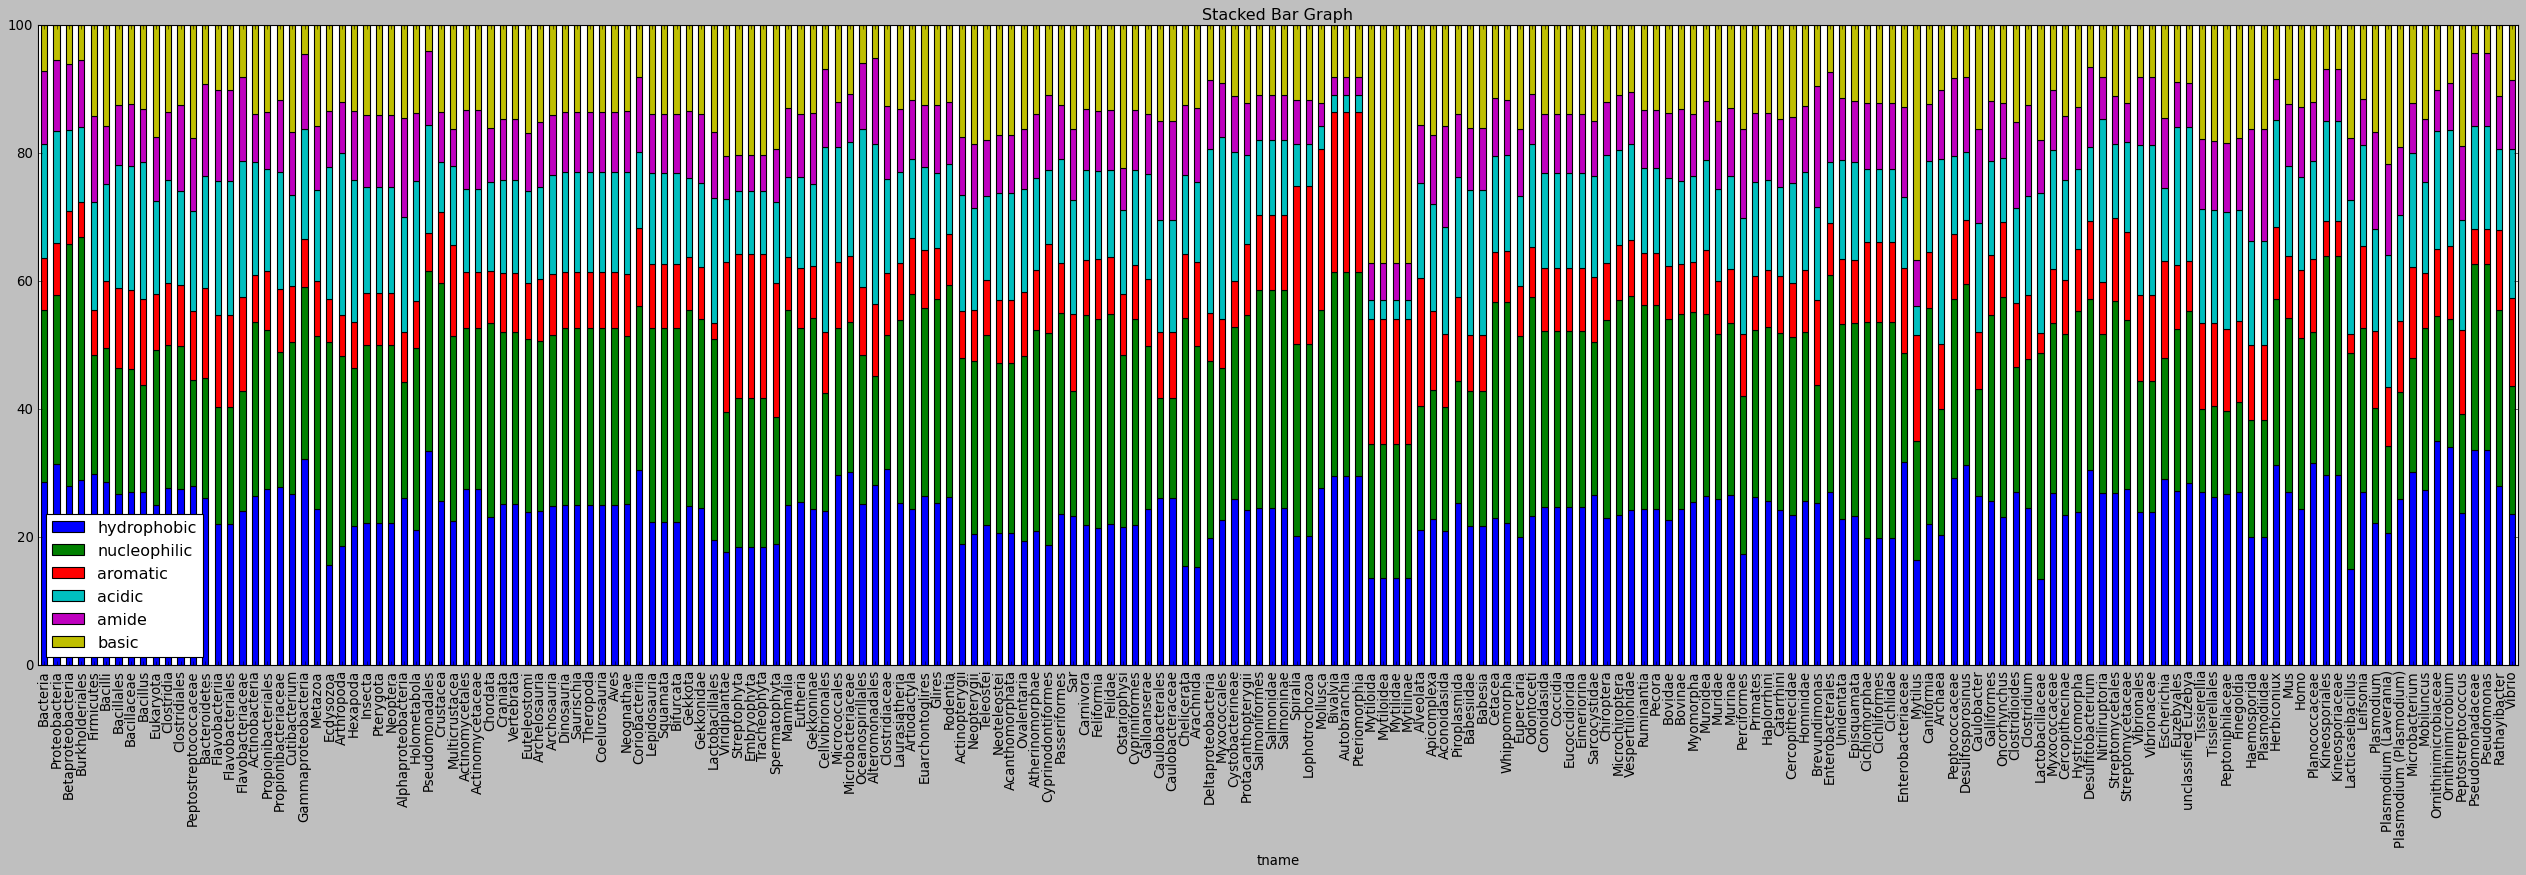

In [105]:
stat_df_simp.plot(
    x = 'tname',
    kind = 'bar',
    stacked = True,
    title = 'Stacked Bar Graph',
    mark_right = True, figsize=(40,10))
plt.savefig('pdf/single_stack_bar.pdf', bbox_inches='tight')

### Pair stacked bar graph computation, for only top 5 pairs. (pair counts)

In [ ]:
### Rank plots

In [4]:

stat_dict = defaultdict(list)
first = defaultdict(int)
second = defaultdict(int)
third = defaultdict(int)
fourth = defaultdict(int)
fifth = defaultdict(int)
rank_dict = {'1st': first, '2nd': second, '3rd': third, '4th': fourth, '5th': fifth}

# Iterate in the aln_files folder, producing con_files/*
for k,v in seqs_taxo.items():
    # align = AlignIO.read(f"aln_files/{k}.aln", "clustal") # clustalw_org1 alignment file computed by ClustalW
    # summary_align = AlignInfo.SummaryInfo(align)
    # consensus = summary_align.dumb_consensus()
    # header = f'MSA Consensus of {len(v)} seqs, protein'
    # Write common sequence to con_files, this is not filterred.
    stat_dict['tname'].append(k)
    consensus = SeqIO.read(f'con_files/{k}.txt', 'fasta')
    # with open(f'con_files/{k}.txt', 'w') as f:
    #     print(SeqRecord(consensus, header, '', '').format('fasta'), file=f)
    # producing pair_files/*
    tseq = str(consensus.seq)

    # Note here is the counting rules for common sequence.
    # Remove those in 'XAGP'
    n_tseq = [cc for cc in tseq if cc not in 'XAGP'] # in 'X'
    # Group the A into 6 categories.
    pseq = ''.join([aasub[b] for b in n_tseq])
    # 2-gram sliding along the index 0.
    # single = [pname(pseq[i]) for i in range(len(pseq))]
    pair = [pname(sorted(pseq[i:i+2])) for i in range(len(pseq)-1)]
    c = collections.Counter(pair)
    # c.most_common()
    # with open(f'single_files/{k}.txt', 'w') as f:
    #     print(c.most_common(), file=f)
    num_k = 5
    stat_dict['aa_sum'].append(c.most_common(num_k)) # aa_sum column append rows.
    top5_tuples = c.most_common(num_k)
    for i, elem in enumerate(top5_tuples):
        if i == 0:
            rank_dict['1st'][elem[0]] +=1
        if i == 1:
            rank_dict['2nd'][elem[0]] +=1
        if i == 2:
            rank_dict['3rd'][elem[0]] +=1
        if i == 3:
            rank_dict['4th'][elem[0]] +=1
        if i == 4:
            rank_dict['5th'][elem[0]] +=1



    sum_counts = 0
    for x, y in c.most_common(num_k): # x is pair, y is count.
        sum_counts += y*2 # 2 times because it's a pair.

    aa_dict = defaultdict(int)
    for x, y in c.most_common(num_k):
        list_x = x.split('-')
        aa_dict[list_x[0].strip()] += y
        aa_dict[list_x[1].strip()] += y

    stat_dict['hydrophobic'].append(aa_dict['hydrophobic']*100/sum_counts)
    stat_dict['nucleophilic'].append(aa_dict['nucleophilic']*100/sum_counts)
    stat_dict['aromatic'].append(aa_dict['aromatic']*100/sum_counts)
    stat_dict['acidic'].append(aa_dict['acidic']*100/sum_counts)
    stat_dict['amide'].append(aa_dict['amide']*100/sum_counts)
    stat_dict['basic'].append(aa_dict['basic']*100/sum_counts)

stat_df = pd.DataFrame(stat_dict)

<IPython.core.display.Javascript object>

In [5]:
rank_df = pd.DataFrame(rank_dict)
rank_df

<IPython.core.display.Javascript object>

,1st,2nd,3rd,4th,5th
nucleophilic - hydrophobic,129.0,36.0,18.0,6.0,5.0
hydrophobic - acidic,6.0,37.0,23.0,23.0,22.0
nucleophilic - acidic,7.0,15.0,56.0,28.0,25.0
nucleophilic - nucleophilic,28.0,58.0,18.0,7.0,10.0
hydrophobic - basic,7.0,14.0,17.0,20.0,28.0
aromatic - basic,5.0,NaN,4.0,1.0,NaN
acidic - acidic,2.0,3.0,NaN,6.0,3.0
nucleophilic - basic,1.0,8.0,15.0,34.0,20.0
nucleophilic - aromatic,11.0,2.0,6.0,8.0,7.0
basic - basic,1.0,4.0,NaN,NaN,1.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

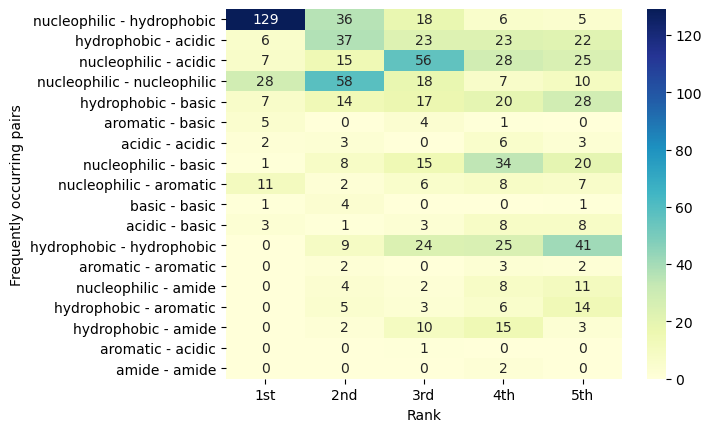

In [8]:
rank_df_clean = rank_df.fillna(0)
rank_df_clean
ax = sns.heatmap(rank_df_clean, annot=True, cmap="YlGnBu", fmt='.0f')
ax.set_xlabel("Rank")
ax.set_ylabel("Frequently occurring pairs")
plt.savefig("SI_figs/rank_heatmap.pdf", bbox_inches="tight")

In [80]:
stat_df.head()

,tname,aa_sum,hydrophobic,nucleophilic,aromatic,acidic,amide,basic
0,Bacteria,"[(nucleophilic - hydrophobic, 1617), (hydropho...",41.496303,40.963462,0.0,17.540235,0.000000,0.000000
1,Proteobacteria,"[(nucleophilic - hydrophobic, 651), (hydrophob...",49.832589,25.892857,0.0,17.243304,7.031250,0.000000
2,Betaproteobacteria,"[(nucleophilic - hydrophobic, 521), (nucleophi...",30.258792,50.796284,0.0,12.873258,6.071666,0.000000
3,Burkholderiales,"[(nucleophilic - hydrophobic, 560), (nucleophi...",42.108626,45.559105,0.0,6.198083,6.134185,0.000000
4,Firmicutes,"[(nucleophilic - hydrophobic, 118), (hydrophob...",58.695652,12.826087,0.0,11.630435,9.021739,7.826087


In [84]:
stat_df['aa_sum'][0]

[('nucleophilic - hydrophobic', 1617),
 ('hydrophobic - acidic', 879),
 ('nucleophilic - acidic', 734),
 ('nucleophilic - nucleophilic', 708),
 ('hydrophobic - hydrophobic', 660)]

In [98]:
stat_df_simp = stat_df.drop(columns='aa_sum')
stat_df_simp.to_csv('pair_stats.csv', float_format='{:.2f}'.format)

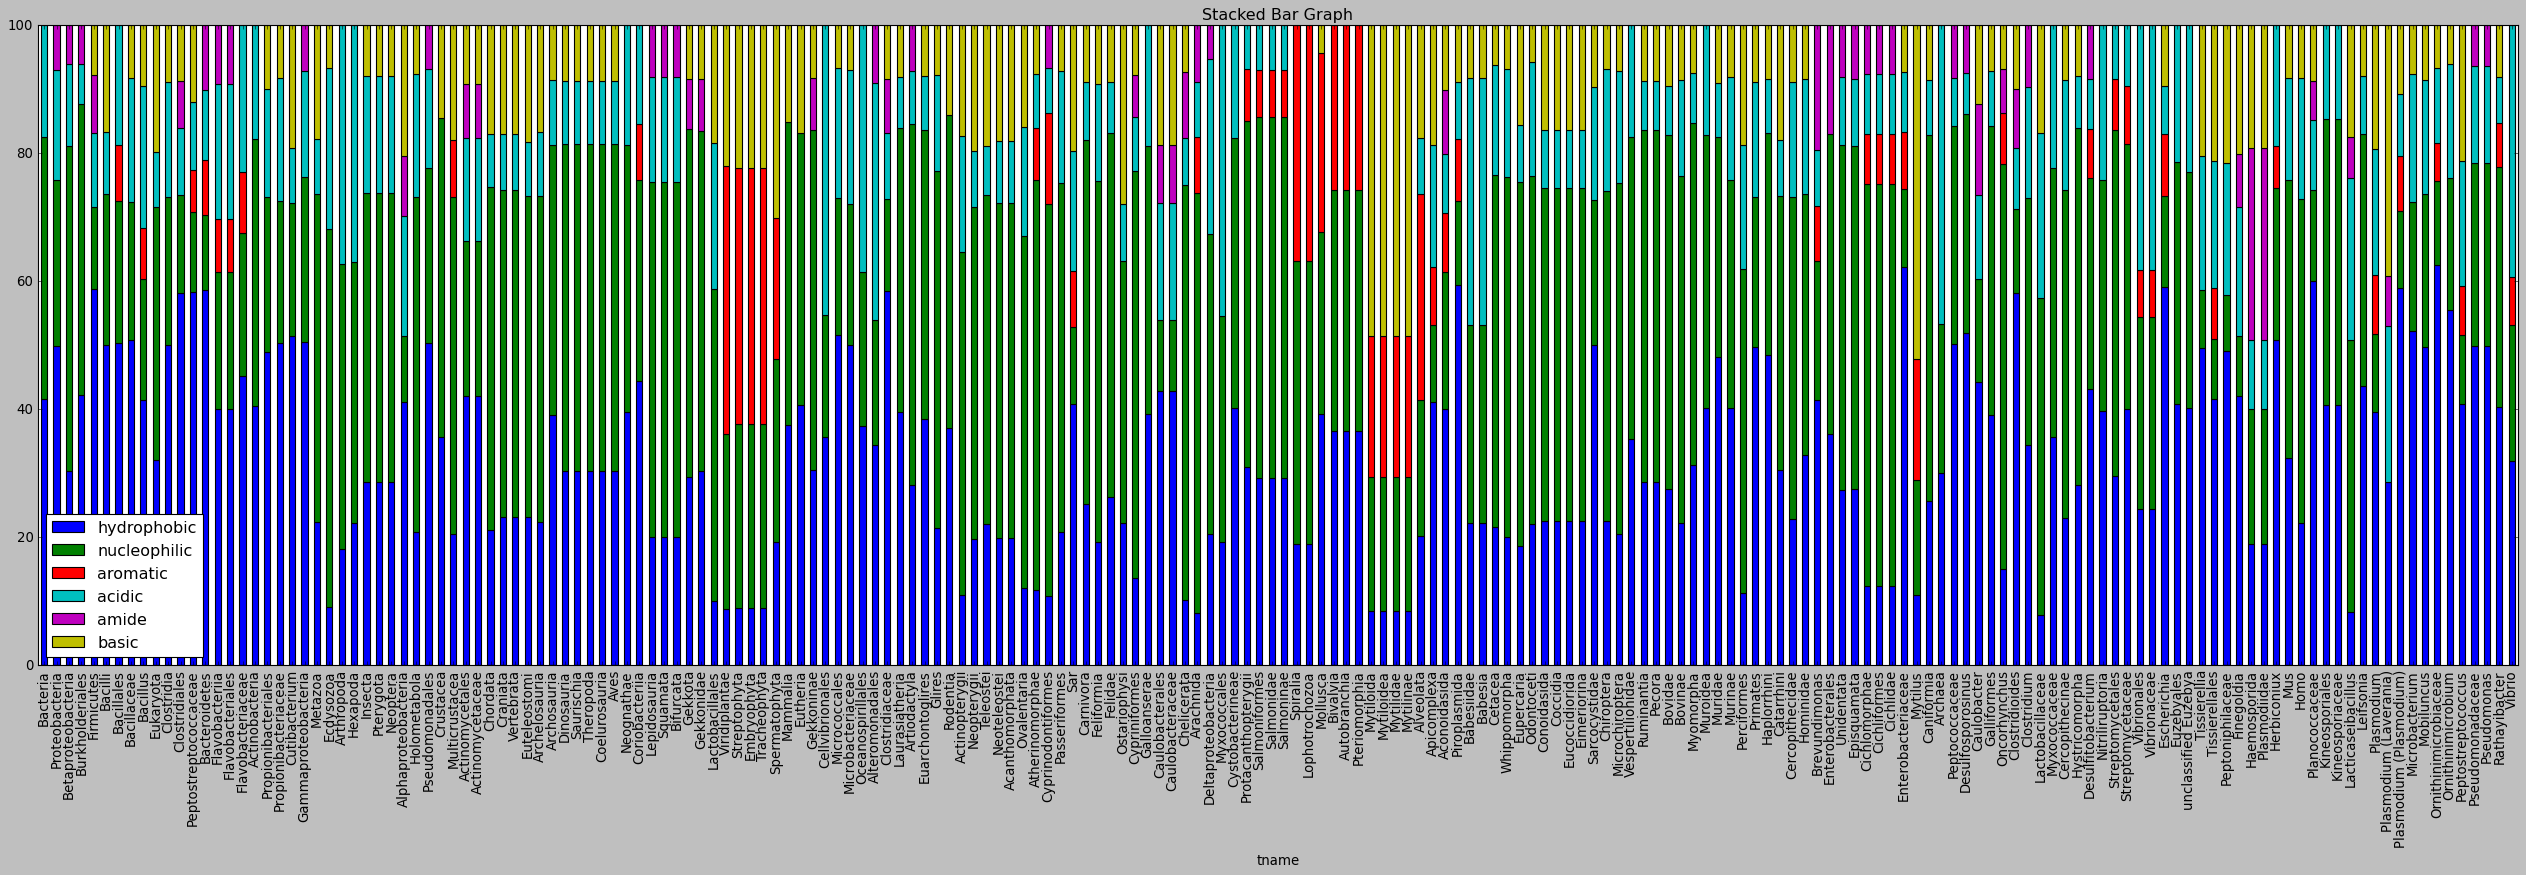

In [100]:
stat_df_simp.plot(
    x = 'tname',
    kind = 'bar',
    stacked = True,
    title = 'Stacked Bar Graph',
    mark_right = True, figsize=(40,10))

plt.savefig('pdf/pair_stack_bar.pdf', bbox_inches='tight')

### Contiguted As block distribution counts. (block_size)

In [ ]:

from itertools import groupby
import seaborn as sns
stat_dict = defaultdict(list)

# Iterate in the aln_files folder, producing con_files/*
for k,v in tqdm(seqs_taxo.items()):
    # align = AlignIO.read(f"aln_files/{k}.aln", "clustal") # clustalw_org1 alignment file computed by ClustalW
    # summary_align = AlignInfo.SummaryInfo(align)
    # consensus = summary_align.dumb_consensus()
    # header = f'MSA Consensus of {len(v)} seqs, protein'
    # Write common sequence to con_files, this is not filterred.
    # stat_dict['tname'].append(k)
    consensus = SeqIO.read(f'con_files/{k}.txt', 'fasta')
    # with open(f'con_files/{k}.txt', 'w') as f:
    #     print(SeqRecord(consensus, header, '', '').format('fasta'), file=f)
    # producing pair_files/*
    tseq = str(consensus.seq)

    # Note here is the counting rules for common sequence.
    # Remove those in 'XAGP'
    n_tseq = [cc for cc in tseq if cc not in 'XAGP'] # in 'X'
    # Group the A into 6 categories.
    pseq = ''.join([aasub[b] for b in n_tseq])
    groups = groupby(pseq)
    partitioned_list = []
    for key, g in groups:
        partitioned_list.append("".join(list(g)))
    partitioned_c = collections.Counter(partitioned_list)
    mc = partitioned_c.most_common()
    block_max = max([len(x) for x, _ in mc])

    # Note that df.plot(kind=) in default use the first column as the index, i.e. the x axis.
    # This time not use defaultdict(list), but use np.zeros to generte the ndarrays to store data and fill it out.
    mat = np.zeros((block_max, 7))
    mat[:,0] = np.array(list(range(1, block_max+1)))
    for x, y in mc:
        mat[len(x)-1, int(x[0])-1] = y # x[0]-1 as we remove small 1
    df = pd.DataFrame(mat, columns=['block_size', 'nucleophilic', 'hydrophobic','aromatic', 'acidic', 'amide', 'basic'])
# """
            #    '2': 'nucleophilic',
            #    '3': 'hydrophobic',
            #    '4': 'aromatic',
            #    '5': 'acidic',
            #    '6': 'amide',
            #    '7': 'basic'}
            #    """
    # stat_all = defaultdict(list)
    # stat_all['block_size'] = list(range(1, block_max+1))
    # ic(mc)
    # ic(groups)
    df_index = df.set_index('block_size')

    sns.heatmap(df_index, annot=True, cmap="YlGnBu")
    plt.savefig(f'SI_figs/heatmap/{k}_heatmap.pdf', bbox_inches='tight')
    plt.clf()


### Contiguted As block distribution counts. (block_size for only Arachnida, Arthropoda..., 8 in total)

In [8]:

from itertools import groupby
import seaborn as sns
stat_dict = defaultdict(list)

# Iterate in the aln_files folder, producing con_files/*
for k,v in tqdm (seqs_taxo.items()):
    # align = AlignIO.read(f"aln_files/{k}.aln", "clustal") # clustalw_org1 alignment file computed by ClustalW
    # summary_align = AlignInfo.SummaryInfo(align)
    # consensus = summary_align.dumb_consensus()
    # header = f'MSA Consensus of {len(v)} seqs, protein'
    # Write common sequence to con_files, this is not filterred.
    # stat_dict['tname'].append(k)
    if k not in {'Arachnida', 'Arthropoda', 'Crustacea', 'Escherichia', 'Gekkonidae', 'Myxococcales', 'Mollusca', 'Mytilidae'}:
        continue
    consensus = SeqIO.read(f'con_files/{k}.txt', 'fasta')
    # with open(f'con_files/{k}.txt', 'w') as f:
    #     print(SeqRecord(consensus, header, '', '').format('fasta'), file=f)
    # producing pair_files/*
    tseq = str(consensus.seq)

    # Note here is the counting rules for common sequence.
    # Remove those in 'XAGP'
    n_tseq = [cc for cc in tseq if cc not in 'XAGP'] # in 'X'
    # Group the A into 6 categories.
    pseq = ''.join([aasub[b] for b in n_tseq])
    groups = groupby(pseq)
    partitioned_list = []
    for key, g in groups:
        partitioned_list.append("".join(list(g)))
    partitioned_c = collections.Counter(partitioned_list)
    mc = partitioned_c.most_common()
    block_max = max([len(x) for x, _ in mc])

    # Note that df.plot(kind=) in default use the first column as the index, i.e. the x axis.
    # This time not use defaultdict(list), but use np.zeros to generte the ndarrays to store data and fill it out.
    mat = np.zeros((block_max, 7))
    mat[:,0] = np.array(list(range(1, block_max+1)))
    for x, y in mc:
        mat[len(x)-1, int(x[0])-1] = y # x[0]-1 as we remove small 1
    df = pd.DataFrame(mat, columns=['block_size', 'nucleophilic', 'hydrophobic','aromatic', 'acidic', 'amide', 'basic'])
# """
            #    '2': 'nucleophilic',
            #    '3': 'hydrophobic',
            #    '4': 'aromatic',
            #    '5': 'acidic',
            #    '6': 'amide',
            #    '7': 'basic'}
            #    """
    # stat_all = defaultdict(list)
    # stat_all['block_size'] = list(range(1, block_max+1))
    # ic(mc)
    # ic(groups)
    df = df.set_index('block_size')
    column_sums = df.sum(axis=0)
    df_normalized = df / column_sums

    df_normalized.to_csv(f'SI_figs/review_selected_8_species/{k}.csv')
    sns.heatmap(df_normalized, annot=True, cmap="YlGnBu")
    plt.savefig(f'SI_figs/review_selected_8_species/{k}_heatmap.pdf', bbox_inches='tight')
    plt.clf()


  0%|          | 0/200 [00:00<?, ?it/s]

100%|██████████| 200/200 [00:03<00:00, 58.41it/s]


<Figure size 640x480 with 0 Axes>

### stack_200_block_size

In [17]:
### Stack 200 into one.
import sequence_utils

from importlib import reload; reload(sequence_utils)
from sequence_utils import *

from itertools import groupby
import seaborn as sns
stat_dict = defaultdict(list)
block_max = 10
mat = np.zeros((block_max, 7))

<IPython.core.display.Javascript object>

100%|██████████| 200/200 [00:00<00:00, 749.31it/s]


<AxesSubplot:ylabel='block_size'>

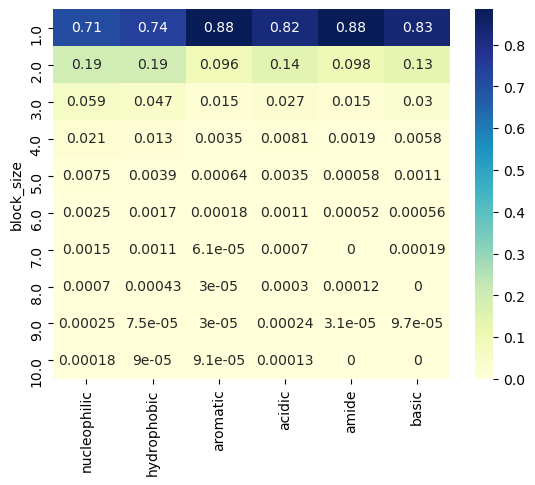

In [18]:

from itertools import groupby
import seaborn as sns
stat_dict = defaultdict(list)

# Iterate in the aln_files folder, producing con_files/*
# mat_all = np.zeros((1000, 7))
for k,v in tqdm.tqdm(seqs_taxo.items()):
    # align = AlignIO.read(f"aln_files/{k}.aln", "clustal") # clustalw_org1 alignment file computed by ClustalW
    # summary_align = AlignInfo.SummaryInfo(align)
    # consensus = summary_align.dumb_consensus()
    # header = f'MSA Consensus of {len(v)} seqs, protein'
    # Write common sequence to con_files, this is not filterred.
    # stat_dict['tname'].append(k)
    consensus = SeqIO.read(f'con_files/{k}.txt', 'fasta')
    # with open(f'con_files/{k}.txt', 'w') as f:
    #     print(SeqRecord(consensus, header, '', '').format('fasta'), file=f)
    # producing pair_files/*
    tseq = str(consensus.seq)

    # Note here is the counting rules for common sequence.
    # Remove those in 'XAGP'
    n_tseq = [cc for cc in tseq if cc not in 'XAGP'] # in 'X'

    one_mat = fill_heatmap_mat(n_tseq)
    mat += one_mat
    


mat[:,0] = np.array(list(range(1, block_max+1)))
mat_percent = np.zeros((block_max, 7))

for i in range(10):
    for j in range(1,7):
        mat_percent[i][j] = mat[i][j]/np.sum(mat[:,j])

mat_percent[:,0] = np.array(list(range(1, block_max+1)))

df = pd.DataFrame(mat_percent, columns=['block_size', 'nucleophilic', 'hydrophobic','aromatic', 'acidic', 'amide', 'basic'])
# """
        #    '2': 'nucleophilic',
        #    '3': 'hydrophobic',
        #    '4': 'aromatic',
        #    '5': 'acidic',
        #    '6': 'amide',
        #    '7': 'basic'}
        #    """
# stat_all = defaultdict(list)
# stat_all['block_size'] = list(range(1, block_max+1))
# ic(mc)
# ic(groups)
df_index = df.set_index('block_size')

sns.heatmap(df_index, annot=True, cmap="YlGnBu")
# plt.savefig(f'csv/block_size_heatmap_p.pdf', bbox_inches='tight')



### stack_resilin_18_block_size

In [23]:

import pickle
from collections import defaultdict

# seqs_taxo = defaultdict(list)
with open('pkl/seqs_taxo_resilin_top18.pkl','rb') as f:
    seqs_taxo = pickle.load(f)
len(seqs_taxo)

18

<IPython.core.display.Javascript object>

100%|██████████| 18/18 [00:00<00:00, 938.24it/s]


<AxesSubplot:ylabel='block_size'>

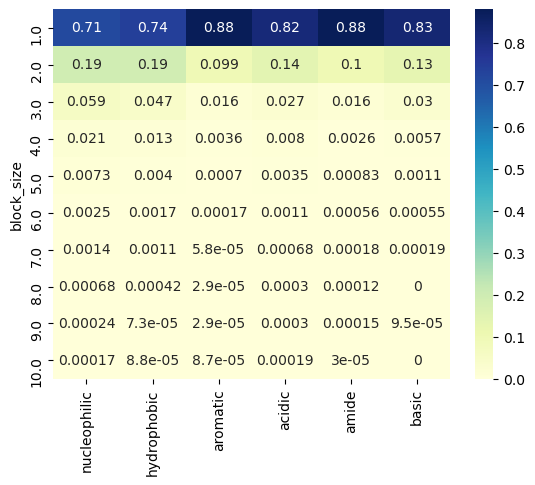

In [24]:

from itertools import groupby
import seaborn as sns
stat_dict = defaultdict(list)

# Iterate in the aln_files folder, producing con_files/*
# mat_all = np.zeros((1000, 7))
for k,v in tqdm.tqdm(seqs_taxo.items()):
    # align = AlignIO.read(f"aln_files/{k}.aln", "clustal") # clustalw_org1 alignment file computed by ClustalW
    # summary_align = AlignInfo.SummaryInfo(align)
    # consensus = summary_align.dumb_consensus()
    # header = f'MSA Consensus of {len(v)} seqs, protein'
    # Write common sequence to con_files, this is not filterred.
    # stat_dict['tname'].append(k)
    consensus = SeqIO.read(f'con_files_resilin/{k}.txt', 'fasta')
    # with open(f'con_files/{k}.txt', 'w') as f:
    #     print(SeqRecord(consensus, header, '', '').format('fasta'), file=f)
    # producing pair_files/*
    tseq = str(consensus.seq)

    # Note here is the counting rules for common sequence.
    # Remove those in 'XAGP'
    n_tseq = [cc for cc in tseq if cc not in 'XAGP'] # in 'X'

    one_mat = fill_heatmap_mat(n_tseq)
    mat += one_mat
    


mat[:,0] = np.array(list(range(1, block_max+1)))
mat_percent = np.zeros((block_max, 7))

for i in range(10):
    for j in range(1,7):
        mat_percent[i][j] = mat[i][j]/np.sum(mat[:,j])

mat_percent[:,0] = np.array(list(range(1, block_max+1)))

df = pd.DataFrame(mat_percent, columns=['block_size', 'nucleophilic', 'hydrophobic','aromatic', 'acidic', 'amide', 'basic'])
# """
        #    '2': 'nucleophilic',
        #    '3': 'hydrophobic',
        #    '4': 'aromatic',
        #    '5': 'acidic',
        #    '6': 'amide',
        #    '7': 'basic'}
        #    """
# stat_all = defaultdict(list)
# stat_all['block_size'] = list(range(1, block_max+1))
# ic(mc)
# ic(groups)
df_index = df.set_index('block_size')

sns.heatmap(df_index, annot=True, cmap="YlGnBu")
# plt.savefig(f'csv/block_size_heatmap_p.pdf', bbox_inches='tight')



In [25]:
df_index.to_csv('stack_200_block_size/stack_resilin_18_block_size.csv')

### stack_fibrous_25_block_size

In [27]:

import pickle
from collections import defaultdict

# seqs_taxo = defaultdict(list)
with open('pkl/seqs_taxo_fibrous_top25.pkl','rb') as f:
    seqs_taxo = pickle.load(f)
len(seqs_taxo)

25

<IPython.core.display.Javascript object>

100%|██████████| 25/25 [00:00<00:00, 498.62it/s]


<AxesSubplot:ylabel='block_size'>

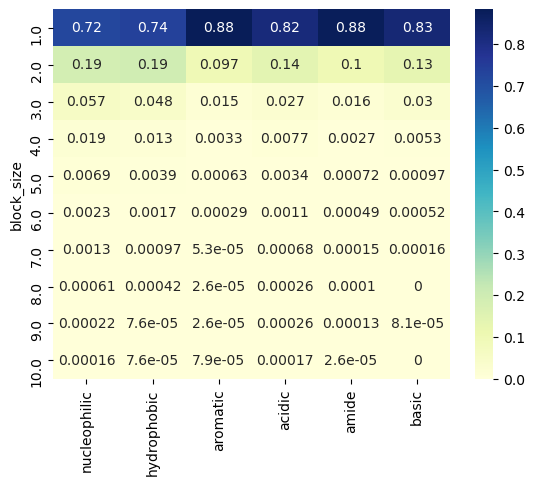

In [28]:

from itertools import groupby
import seaborn as sns
stat_dict = defaultdict(list)

# Iterate in the aln_files folder, producing con_files/*
# mat_all = np.zeros((1000, 7))
for k,v in tqdm.tqdm(seqs_taxo.items()):
    # align = AlignIO.read(f"aln_files/{k}.aln", "clustal") # clustalw_org1 alignment file computed by ClustalW
    # summary_align = AlignInfo.SummaryInfo(align)
    # consensus = summary_align.dumb_consensus()
    # header = f'MSA Consensus of {len(v)} seqs, protein'
    # Write common sequence to con_files, this is not filterred.
    # stat_dict['tname'].append(k)
    consensus = SeqIO.read(f'con_files_fibrous/{k}.txt', 'fasta')
    # with open(f'con_files/{k}.txt', 'w') as f:
    #     print(SeqRecord(consensus, header, '', '').format('fasta'), file=f)
    # producing pair_files/*
    tseq = str(consensus.seq)

    # Note here is the counting rules for common sequence.
    # Remove those in 'XAGP'
    n_tseq = [cc for cc in tseq if cc not in 'XAGP'] # in 'X'

    one_mat = fill_heatmap_mat(n_tseq)
    mat += one_mat
    


mat[:,0] = np.array(list(range(1, block_max+1)))
mat_percent = np.zeros((block_max, 7))

for i in range(10):
    for j in range(1,7):
        mat_percent[i][j] = mat[i][j]/np.sum(mat[:,j])

mat_percent[:,0] = np.array(list(range(1, block_max+1)))

df = pd.DataFrame(mat_percent, columns=['block_size', 'nucleophilic', 'hydrophobic','aromatic', 'acidic', 'amide', 'basic'])
# """
        #    '2': 'nucleophilic',
        #    '3': 'hydrophobic',
        #    '4': 'aromatic',
        #    '5': 'acidic',
        #    '6': 'amide',
        #    '7': 'basic'}
        #    """
# stat_all = defaultdict(list)
# stat_all['block_size'] = list(range(1, block_max+1))
# ic(mc)
# ic(groups)
df_index = df.set_index('block_size')

sns.heatmap(df_index, annot=True, cmap="YlGnBu")
# plt.savefig(f'csv/block_size_heatmap_p.pdf', bbox_inches='tight')



In [29]:
df_index.to_csv('stack_200_block_size/stack_fibrous_25_block_size.csv')

In [ ]:
### Added (but not used.)

In [10]:

import sequence_utils

from importlib import reload; reload(sequence_utils)
from sequence_utils import *

seqs_taxo = defaultdict(list)
with open('seqs_taxo.pkl','rb') as f: # Five large species
    seqs_taxo = pickle.load(f)
# with open('pkl/seqs_species_8.pkl','rb') as f: # Eight small speceis
#     seqs_taxo = pickle.load(f)
# print(seqs_taxo)
# {k:name : v:full_sequence}
print(seqs_taxo.keys())
print(len(seqs_taxo))

<IPython.core.display.Javascript object>

KeyboardInterrupt: 